# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [20]:
# Initial imports
import os
import nltk
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
load_dotenv()
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [21]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [22]:
type(api_key)

str

In [23]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [24]:
type(newsapi)

newsapi.newsapi_client.NewsApiClient

In [115]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND Bitcoin",
    language="en",
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 9091


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'Tesla buys $1.5 in Bitcoin, will soon accept it as payment',
 'description': 'Elon Musk’s cryptocurrency hype was more than just idle talk. CNBC reports that Tesla not only bought $1.5 billion worth of Bitcoin to help “diversify and maximize” its returns, but will start taking payments using the digital asset sometime in the “near futu…',
 'url': 'https://www.engadget.com/tesla-to-take-bitcoin-payments-140109988.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-02/389f89e0-6a11-11eb-b5c5-309f2241e56a',
 'publishedAt': '2021-02-08T14:01:09Z',
 'content': 'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]'}

In [116]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum AND Ethereum",
    language="en",
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 1820


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
 'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
 'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
 'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
 'publishedAt': '2021-02-18T16:16:57Z',
 'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [

In [132]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral","positive","text", "date", ]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text,date
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...,2021-02-08
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur...",2021-02-09
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai...",2021-02-09
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...,2021-02-12
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i...",2021-02-08


In [133]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral","positive","text", "date", ]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text,date
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...,2021-02-18
1,0.0000,0.000,1.000,0.000,Coinbase plans to go public by way of a direct...,2021-01-28
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,2021-02-04
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...,2021-02-03
4,0.0258,0.000,0.970,0.030,While the first Christie's auction of digital ...,2021-02-20


In [134]:
# Describe the Bitcoin Sentiment
bitcoin_score = bitcoin_df.describe()
bitcoin_score

,compound,negative,neutral,positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.199928,0.019056,0.908778,0.072111
std,0.376340,0.035630,0.081887,0.086707
min,-0.503700,0.000000,0.647000,0.000000
25%,0.000000,0.000000,0.868750,0.000000
50%,0.177900,0.000000,0.919500,0.053500
75%,0.411575,0.024000,0.957250,0.098500
max,0.921700,0.114000,1.000000,0.353000


In [135]:
# Describe the Ethereum Sentiment
ethereum_score = ethereum_df.describe()
ethereum_score

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.189495,0.005950,0.942750,0.051300
std,0.274088,0.026609,0.062097,0.054785
min,-0.340000,0.000000,0.818000,0.000000
25%,0.000000,0.000000,0.900000,0.000000
50%,0.012900,0.000000,0.949500,0.046500
75%,0.365100,0.000000,1.000000,0.082000
max,0.709600,0.119000,1.000000,0.144000


In [136]:
# Q1: Which coin had the highest mean positive score?
if ethereum_score['positive'][1] < bitcoin_score['positive'][1]:
    print('Bitcoin has a higher mean positive score')
elif ethereum_score['positive'][1] == bitcoin_score['positive'][1]:
    print('Both Bitcoin and Ethereum have the same mean positive score')
else:
    print('Ethereum has a higher mean positive score')

Bitcoin has a higher mean positive score


In [137]:
# Q2: Which coin had the highest compound score?
if ethereum_score['compound'][7] < bitcoin_score['compound'][7]:
    print('Bitcoin had the highest compound score')
elif ethereum_score['compound'][7] == bitcoin_score['compound'][7]:
    print('Both Bitcoin and Ethereum had the same max compound score')
else:
    print('Ethereum had the higheest compound score')

Bitcoin had the highest compound score


In [138]:
# Q3. Which coin had the highest positive score?
if ethereum_score['positive'][7] < bitcoin_score['positive'][7]:
    print('Bitcoin had the highest positive score')
elif ethereum_score['positive'][7] == bitcoin_score['positive'][7]:
    print('Both Bitcoin and Ethereum had the same max positive score')
else:
    print('Ethereum had the higheest positive score')

Bitcoin had the highest positive score


---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [139]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import string
import re

In [140]:
# Expand the default stopwords list if necessary
sw_addon = {',', 'how', 'what', 'https', 'damn','much','ha', 'btc' }

In [141]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    #convert to lower and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
        
    return tokens


In [150]:
# Create a new tokens column for bitcoin
bitcoin_tokens = bitcoin_df.copy()

bitcoin_tokenized = []
for i in bitcoin_tokens['text']:
    tokenized_articles = tokenizer(i)
    bitcoin_tokenized.append({'tokens':tokenized_articles})
    
tokens_df= pd.DataFrame(bitcoin_tokenized)
bitcoin_tokens['tokens'] = tokens_df

bitcoin_tokens.drop(columns=['date'],inplace=True)

bitcoin_tokens.head()

,compound,negative,neutral,positive,text,tokens
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...,"[elon, musks, cryptocurrency, hype, wa, idle, ..."
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,..."
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, said, invested,..."
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i...","[today, sec, filing, tesla, disclosed, acquire..."


In [152]:
# Create a new tokens column for ethereum
ethereum_tokens = ethereum_df.copy()


tokenized_eth = []
for i in ethereum_tokens['text']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_text':tokenized_articles})
    
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens'] = tokens_df_eth

ethereum_tokens.drop(columns=['date'],inplace=True)
    
ethereum_tokens.head()

,compound,negative,neutral,positive,text,tokens
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,0.0000,0.000,1.000,0.000,Coinbase plans to go public by way of a direct...,"[coinbase, plan, go, public, way, direct, list..."
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, stafffile, photo, representation, et..."
4,0.0258,0.000,0.970,0.030,While the first Christie's auction of digital ...,"[first, christies, auction, digital, artwork, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [104]:
from collections import Counter
from nltk import ngrams

In [167]:

bitcoin_sent = []
for sent in bitcoin_tokens['text']:
    sent_list_bit = sent
    bitcoin_sent.append(sent_list_bit)
    
eth_sent = []
for sent in ethereum_tokens['text']:
    sent_list_eth = sent 
    eth_sent.append(sent_list_eth)

In [168]:

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_20 = dict(Counter(bigrams).most_common(20))
    return pd.DataFrame(list(top_20.items()), columns=['bigram', 'count'])

In [169]:
# Generate the Bitcoin N-grams where N=2
bigram_counter(bitcoin_sent)

,bigram,count
0,"(billion, bitcoin)",3
1,"(elon, musks)",2
2,"(elon, musk)",2
3,"(jack, dorsey)",2
4,"(jay, z)",2
5,"(popular, cryptocurrency)",2
6,"(bitcoin, future)",2
7,"(char, bitcoin)",2
8,"(alltime, high)",2
9,"(musks, cryptocurrency)",1


In [170]:
# Generate the Ethereum N-grams where N=2
bigram_counter(eth_sent)

,bigram,count
0,"(record, high)",6
1,"(char, reuters)",5
2,"(feb, reuters)",5
3,"(char, new)",4
4,"(new, york)",4
5,"(photo, representation)",3
6,"(representation, ethereum)",3
7,"(ethereum, virtual)",3
8,"(virtual, currency)",3
9,"(currency, standing)",3


In [171]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [188]:
bitcoin_words = []
for text in bitcoin_tokens['tokens']:
    for word in text:
        bitcoin_words.append(word)
        
        
ethereum_words = []
for text in ethereum_tokens['tokens']:
    for word in text:
        ethereum_words.append(word)

In [189]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_words)

[('char', 18),
 ('bitcoin', 12),
 ('cryptocurrency', 8),
 ('tesla', 6),
 ('elon', 4),
 ('wa', 4),
 ('billion', 4),
 ('said', 4),
 ('company', 4),
 ('musk', 3)]

In [190]:
# Get the top 10 words for Ethereum
token_count(ethereum_words)

[('char', 20),
 ('reuters', 15),
 ('ethereum', 13),
 ('cryptocurrency', 7),
 ('week', 7),
 ('bitcoin', 7),
 ('high', 7),
 ('new', 6),
 ('record', 6),
 ('february', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [191]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

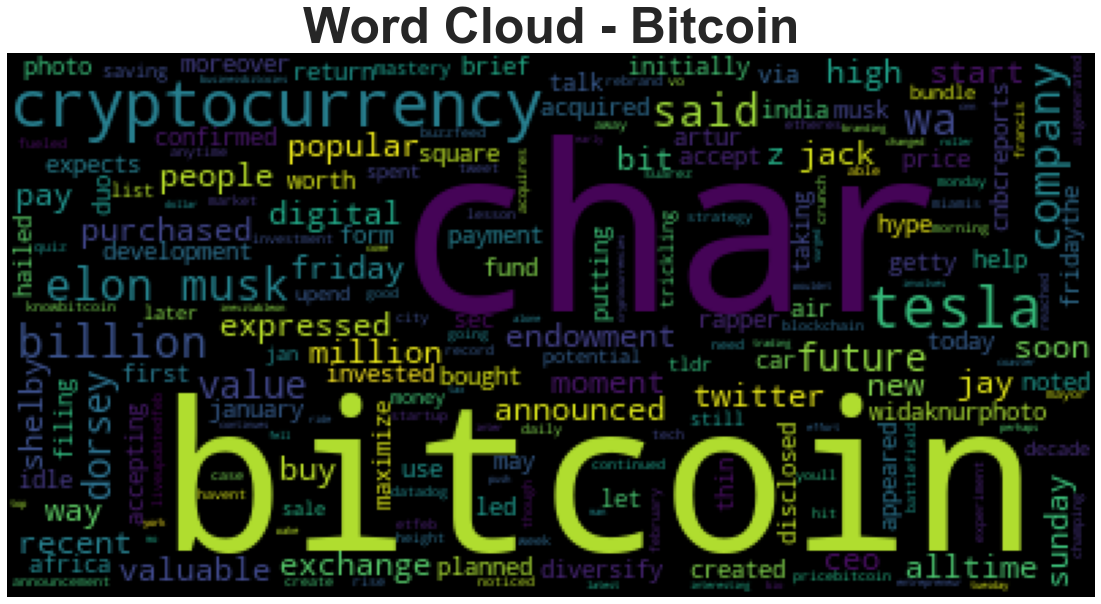

In [192]:
# Generate the Bitcoin word cloud
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string

bitcoin_words = processed_text(bitcoin_words)

wc = WordCloud().generate(bitcoin_words)
fig = plt.figure()
plt.imshow(wc)
plt.title('Word Cloud - Bitcoin', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

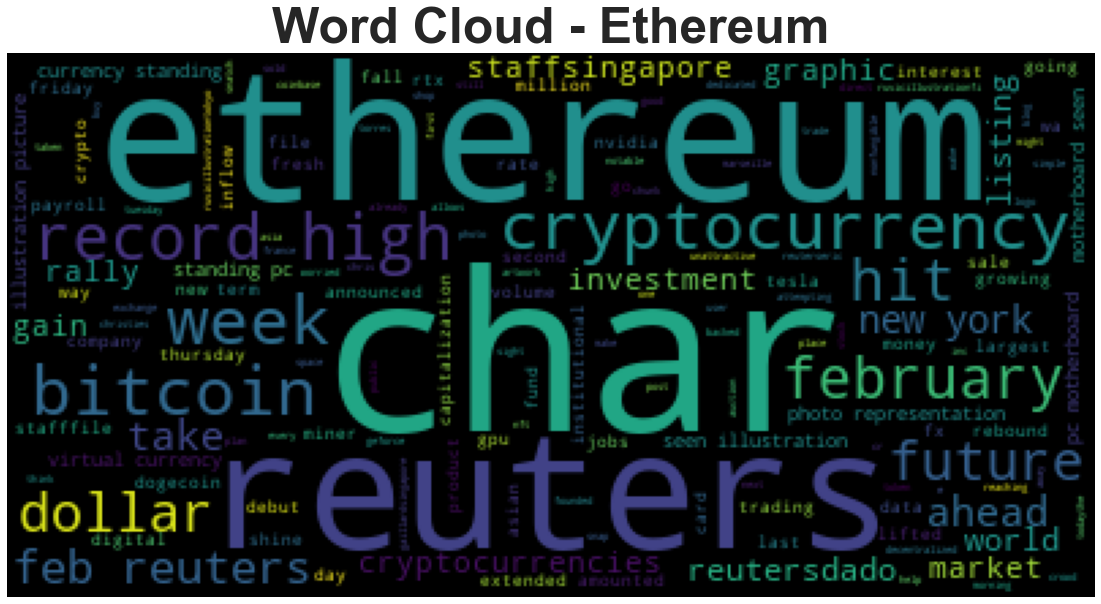

In [194]:
# Generate the Ethereum word cloud
ethereum_words = processed_text(ethereum_words)

fig = plt.figure()
wc = WordCloud().generate(ethereum_words)
plt.imshow(wc)
plt.title('Word Cloud - Ethereum', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [196]:
import spacy
from spacy import displacy

In [197]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [198]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [199]:
# Concatenate all of the bitcoin text together
string_bitcoin = ' '.join(bitcoin_sent)
string_bitcoin

'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars] Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via Getty… [+6118 chars] For a brief moment on Sunday, before Tesla said it had invested $1.5 billion in bitcoin and planned to let people use the cryptocurrency to pay for its cars, bitcoins price could be expressed with a … [+3302 chars] Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India, Dorsey said Friday.\r\nThe duo is putting 500 bitcoin, which is … [+3984 chars] Today in an SEC filing, Tesla disclosed that it has acquired $1.5 billion in bitcoin, the popular cryptocurrency. Moreover, the compan

In [203]:
# Run the NER processor on all of the text
bitcoin_text = nlp(string_bitcoin)

# Add a title to the document
bitcoin_text.user_data['title'] = 'Bitcoin NER'

In [206]:
# Render the visualization
displacy.render(bitcoin_text,style='ent')

In [207]:
# List all Entities
for ent in bitcoin_text.ents:
    print (ent, ent.label_)

Tesla ORG
$1.5 billion MONEY
Elon Musk PERSON
about $ 1.5 billion MONEY
January DATE
Artur ORG
Widak PRODUCT
NurPhoto ORG
Sunday DATE
Tesla ORG
$1.5 billion MONEY
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
Today DATE
SEC ORG
Tesla ORG
$1.5 billion MONEY
first ORDINAL
more than a decade later DATE
21.11 MONEY
Jan. 28 DATE
70% PERCENT
Bitcoin PERSON
Feb. 9, 2021 DATE
8:01 a.m. TIME
Feb. 9, 2021 DATE
8:01 a.m. TIME
Bitcoin PERSON
Teslas PERSON
Monday DATE
1.5 MONEY
Bitcoin PERSON
this morning TIME
over $50,000 MONEY
Jack Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
Francis Suarez PERSON
Friday DATE
Elon Musk PERSON
Twitter PRODUCT
Musk PERSON
New York GPE
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
Cryptocurrencies ORG
handshakes over millions CARDINAL
today DATE
2012 DATE
Alabama

---

## Ethereum NER

In [208]:
# Concatenate all of the bitcoin text together
string_ethereum = ' '.join(eth_sent)
string_ethereum

"Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] Coinbase plans to go public by way of a direct listing, the company announced in a blog post today.\r\nThe cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized to… [+1258 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nTOKYO (Reuters) - E… [+472 chars] By Reuters Staff\r\nFILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration/Fi… [+1379 chars] While the first Christie's auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most not

In [209]:
# Run the NER processor on all of the text
ethereum_text = nlp(string_ethereum)

# Add a title to the document
ethereum_text.user_data['title'] = 'Ethereum NER'


In [210]:
# Render the visualization
displacy.render(ethereum_text,style='ent')

In [211]:
# List all Entities
for ent in ethereum_text.ents:
    print (ent, ent.label_)

GeForce ORG
3060 GPE
GPU ORG
today DATE
2012 DATE
Ethereum ORG
February 3, 2018 DATE
Reuters ORG
Reuters ORG
Ethereum ORG
February 3, 2018 DATE
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
Ethereum ORG
February 3, 2018 DATE
LONDON GPE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Friday DATE
Thyagaraju Adinarayan PERSON
Anna Irrera PERSON
Musk PERSON
Dogecoin GPE
Dogecoin GPE
nearly 68% PERCENT
$0.054496
 MONEY
NEW YORK GPE
Reuters ORG
$245 million MONEY
last